In [ ]:
import numpy as np 
import pandas as pd

**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CHECKING IMAGES FOR CONFIRMATION**

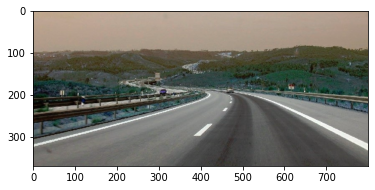

In [ ]:
plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/normal/12.jpg"))

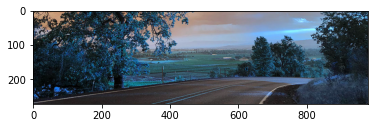

In [ ]:
plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/normal/83.jpg"))

**Part 1 - Data Preprocessing**

****Splitting dataset into training and validation and preprocessing the training set****

In [ ]:
#Splitting dataset into training and validation and preprocessing the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

training_set = train_datagen.flow_from_directory('drive/MyDrive/proj dataset/archive', target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary', subset="training")

Found 546 images belonging to 2 classes.


**Preprocessing the validation set**

In [ ]:
#Preprocessing the validation set
validation_generator = train_datagen.flow_from_directory(
    "drive/MyDrive/proj dataset/archive", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


**Part 2 - Building the CNN**

**Initialising the CNN**

In [ ]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

**Step 1 - Convolution**

In [ ]:
#Step 1 - Convolution

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Step 2 - Pooling**

In [ ]:
#Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Adding a second convolutional layer**

In [ ]:
#Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [ ]:
#Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

**Step 4 - Full Connection**

In [ ]:
#Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [ ]:
#Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

**Compiling the CNN**

In [ ]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [ ]:
#Training the CNN on the Training set and evaluating it on the Validation set
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 [==============================] - 96s 5s/step - loss: 0.6974 - accuracy: 0.6081 - val_loss: 0.5904 - val_accuracy: 0.6741
Epoch 2/25
18/18 [==============================] - 23s 1s/step - loss: 0.4764 - accuracy: 0.7857 - val_loss: 0.6015 - val_accuracy: 0.6148
Epoch 3/25
18/18 [==============================] - 22s 1s/step - loss: 0.3880 - accuracy: 0.8150 - val_loss: 0.4109 - val_accuracy: 0.8148
Epoch 4/25
18/18 [==============================] - 23s 1s/step - loss: 0.3007 - accuracy: 0.8755 - val_loss: 0.4238 - val_accuracy: 0.8074
Epoch 5/25
18/18 [==============================] - 23s 1s/step - loss: 0.2742 - accuracy: 0.8846 - val_loss: 0.3822 - val_accuracy: 0.7852
Epoch 6/25
18/18 [==============================] - 23s 1s/step - loss: 0.2406 - accuracy: 0.8993 - val_loss: 0.3954 - val_accuracy: 0.7926
Epoch 7/25
18/18 [==============================] - 23s 1s/step - loss: 0.2769 - accuracy: 0.8846 - val_loss: 0.3804 - val_accuracy: 0.8296
Epoch 8/25
18/18 [==

**Part 4 - Making a single prediction**

1/1 [==============================] - 0s 165ms/step
normal


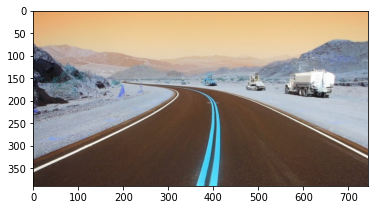

In [ ]:
#Part 4 - Making a single prediction
import keras.utils as image
import numpy as np
#from keras.preprocessing import image
def checker(str):
  test_image = image.load_img('drive/MyDrive/proj dataset/archive/'+str, target_size = (64, 64))
  plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/"+str))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
    prediction = 'pothole'
  else:
    prediction = 'normal'
  return prediction

print(checker('normal/4.jpg'))

1/1 [==============================] - 0s 22ms/step
pothole


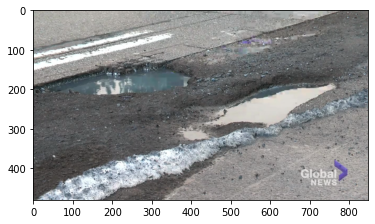

In [ ]:
print(checker('potholes/100.jpg'))


In [ ]:
cnn.save('model.h5')

In [ ]:
# Code to mark the potholes with green rectangles
import cv2 
import numpy as np 

# Load the trained model 
model = tf.keras.models.load_model('model.h5')